<a href="https://colab.research.google.com/github/dantecarlo/Linear-Regression-with-Gradient-Descent/blob/master/Regresi%C3%B3n_Lineal_Gradiente_Descendiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importando librerias neceserias
import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

In [0]:
#Encontrar hypothesis
def hypothesis(X, Theta):
  h = np.dot(Theta.T, X.T).T
  return h 

In [0]:
# Definir la funcion de Costo
def cost_function(h, y, m):
  J = (1 / (2 * m)) * np.sum(np.square(h-y))
  return J

In [0]:
#  Gradient Descent Univariada
# def gradient_descent_uni(x, y, iterations = 10000, learning_rate = 0.01):
#   grad = np.empty([1,3])
#   m_current = b_current = 0
#   n = len(x)
#   plt.scatter(x, y , marker = '+', alpha = 0.8, color="blue")
#   for _ in range(iterations):
#     y_predicted = func(x, m_current, b_current)
    
#     if( _ % 100 == 0 ):
#       plt.scatter(x, y , marker = '+', alpha = 0.8, color="blue")
#       plt.plot(x, y_predicted, color = 'red')

#     cost = (1/n) * sum([val**2 for val in (y - y_predicted)])

#     md = -(2/n) * np.sum(x * (y - y_predicted))
#     bd = -(2/n) * np.sum((y - y_predicted))

#     m_current = m_current - learning_rate * md
#     b_current = b_current - learning_rate * bd
#     # print ("m {}, b {}, cost {}".format(m_current,b_current,cost))
#     # plt.plot(_, cost, "." ,  color = 'red')
#     grad = np.append(grad, [[m_current, b_current, cost]], axis = 0)
#   # print(grad)
#   return grad

In [0]:
# Gradiente descendente
def gradient_descent(X, y, Theta, m, h, learning_rate):
  Theta = Theta - (learning_rate * (1 / m) * np.dot(X.T,(h - y)))
  return Theta

In [0]:
# L.R.model
def lineal_regression_model(X, y, learning_rate, iterations, draw = 0):
  m = y.shape[0]
  # print("m", m)
  
  if len(X.shape) == 1:
     X = np.array([X]).T
  # print(np.ones((X.shape[0],1)))

  # Añadir fila de 1s al comienzo
  X = np.append(np.ones((X.shape[0],1)), X, axis=1)

  # print("X", X)
  # inicializando Theta
  Theta = np.zeros((X.shape[1], 1))
  # Theta = np.random.randn(X.shape[1], 1)
  # print("Theta", Theta)
  
  costs = []
  history_values = []

  # Iteraciones
  for i in range(0, iterations):
    # print("X", np.shape(X))
    # print("Theta", np.shape(Theta))

    h = hypothesis(X, Theta)
    # print("h", np.shape(h))
    # print(h)
    # print("y", np.shape(y))
    cost = cost_function(h, y, m)
    # print("costo:", cost)
    Theta = gradient_descent(X, y, Theta, m, h, learning_rate)
    # print("Theta", Theta)
    RMSE = np.sqrt((1 / m) * np.sum(np.square(h - y)))
    history_values.append([Theta, RMSE])
    costs.append(cost)


  if draw :
    x = range(0, iterations)
    plt.plot(x ,costs)
    plt.xlabel("Iterations(per tens)")
    plt.ylabel("Training cost")
    plt.title("Learning rate" + str(learning_rate))
    plt.grid()
    plt.show()
  history_values = np.array(history_values)
  return history_values, costs

In [0]:
# Importando data
price = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/ex1data2(Home_1f).csv", sep='\t')
ocean = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/oceano_simple.csv", sep='\t')
petrol = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/petrol_consumption.csv", sep='\t')

In [0]:
# Transformando a np.array
price_X = np.array(price["Size_(m2)"])
price_Y = np.array(price["Price"])

ocean_X = np.array(ocean["Sal"])
ocean_Y = np.array(ocean["Temp"])

petrol_X = np.array(petrol[["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]])
petrol_Y = np.array(petrol["Petrol_Consumption"])

In [0]:
# Funcion de regularizacion
def regularization(matrx):
  matrx = (matrx - np.mean(matrx)) / (np.std(matrx))
  # matrx = (matrx - np.mean(matrx)) / (np.max(matrx) - np.min(matrx))
  return matrx

In [10]:
# Normalizar valores
price_X = regularization(price_X)
price_Y = regularization(price_Y)

ocean_X = regularization(ocean_X)
ocean_Y = regularization(ocean_Y)

petrol_X = regularization(petrol_X)
petrol_Y = regularization(petrol_Y)

print(np.mean(ocean_X))
print(np.std(ocean_X))

-3.89072489925318e-15
0.9999999999999999


In [0]:
# Dividiendo training set && validation set Implementacion manual
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [0]:
# Dividiendo training set && validation set
from sklearn.model_selection import train_test_split

price_X_train, price_X_val, price_Y_train, price_Y_val = train_test_split(price_X, price_Y, test_size = 0.33, random_state = 5)
ocean_X_train, ocean_X_val, ocean_Y_train, ocean_Y_val = train_test_split(ocean_X, ocean_Y, test_size = 0.33, random_state = 5)
petrol_X_train, petrol_X_val, petrol_Y_train, petrol_Y_val = train_test_split(petrol_X, petrol_Y, test_size = 0.33, random_state = 5)

In [0]:
# Rectificando datos
price_Y_train = np.array([price_Y_train]).T

price_Y_val = np.array([price_Y_val]).T

ocean_Y_train = np.array([ocean_Y_train]).T

ocean_Y_val = np.array([ocean_Y_val]).T

petrol_Y_train = np.array([petrol_Y_train]).T

petrol_Y_val = np.array([petrol_Y_val]).T

Precio Viviendas


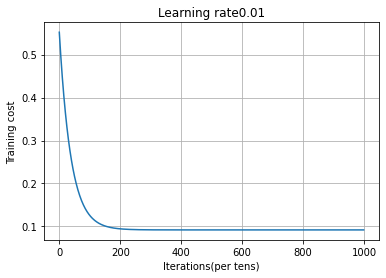

Temperatura Oceánica


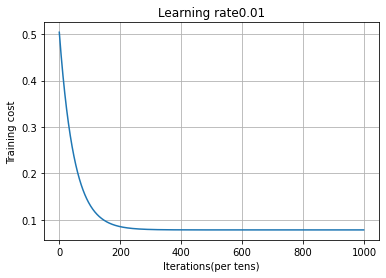

Consumo de Petroleo


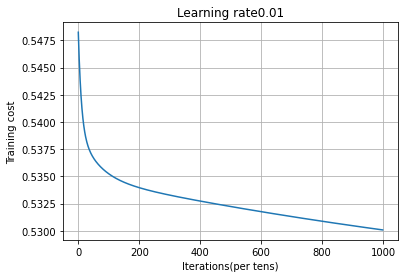

In [14]:
# Llamando a la regresion lineal Conjunto de entrenamiento
learning_rate = 0.01
iterations = 1000

print("Precio Viviendas")
history_price, costs_train = lineal_regression_model(price_X_train, price_Y_train, learning_rate, iterations, 1)
print("Temperatura Oceánica")
history_ocean, costs_train = lineal_regression_model(ocean_X_train, ocean_Y_train, learning_rate, iterations, 1)
print("Consumo de Petroleo")
history_petrol, costs_train = lineal_regression_model(petrol_X_train, petrol_Y_train, learning_rate, iterations, 1)

m: 0.8415799724617409| b: -0.02513136066949685


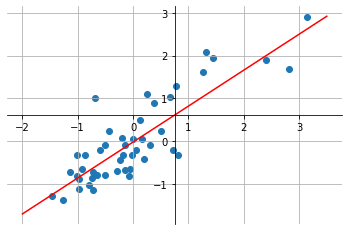

In [15]:
# Grafica Datos price
# print(history_price[-1][0])
m_price = history_price[-1][0].item(1)
b_price = history_price[-1][0].item(0)

print("m: " + str(m_price) + "| b: " + str(b_price))
m_history_price = history_price[:,0]
b_history_price = history_price[:,1]

fig_price = plt.figure()
ax_price = fig_price.add_subplot(1, 1, 1)
ax_price.spines['left'].set_position('center')
ax_price.spines['bottom'].set_position('center')
ax_price.spines['right'].set_color('none')
ax_price.spines['top'].set_color('none')
ax_price.xaxis.set_ticks_position('bottom')
ax_price.yaxis.set_ticks_position('left')
plt.scatter(price_X, price_Y)
x_price = np.arange(-2, 4, 0.5)
y_price = m_price * x_price + b_price
plt.plot(x_price, y_price, '-r')
plt.grid()
plt.show()

m:[0.84158228]
b:[-0.02512726]


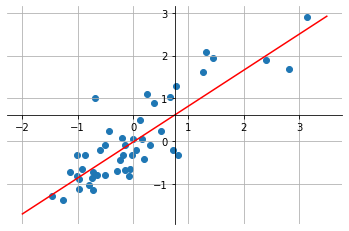

In [16]:
# Ecuacion Normal price
X_1_price = np.array([np.ones(np.shape(price_X_train)[0]), price_X_train]).T
B_price = np.linalg.inv(X_1_price.T @ X_1_price) @ X_1_price.T @ price_Y_train
m_price = B_price[1]
b_price = B_price[0]
print("m:" +  str(m_price))
print("b:" +  str(b_price))

fig_price = plt.figure()
ax_price = fig_price.add_subplot(1, 1, 1)
x_price = np.linspace(-5,5,100)
ax_price.spines['left'].set_position('center')
ax_price.spines['bottom'].set_position('center')
ax_price.spines['right'].set_color('none')
ax_price.spines['top'].set_color('none')
ax_price.xaxis.set_ticks_position('bottom')
ax_price.yaxis.set_ticks_position('left')
plt.scatter(price_X, price_Y)
x_price = np.arange(-2, 4, 0.5)
y_price = m_price * x_price + b_price
plt.plot(x_price, y_price, '-r')
plt.grid()
plt.show()

m: -0.9130963572114017| b: -0.00859692877530464


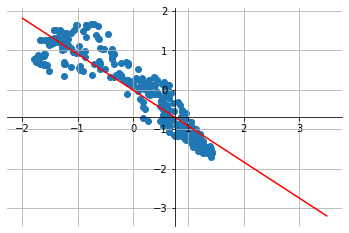

In [17]:
# Grafica Datos ocean
m_ocean = history_ocean[-1][0].item(1)
b_ocean = history_ocean[-1][0].item(0)

print("m: " + str(m_ocean) + "| b: " + str(b_ocean))
m_history_ocean = history_ocean[:,0]
b_history_ocean = history_ocean[:,1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-5,5,100).T
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.scatter(ocean_X_train, ocean_Y_train)
x_ocean = np.arange(-2, 4, 0.5)
y_ocean = m_ocean * x_ocean + b_ocean
plt.plot(x_ocean, y_ocean, '-r')
plt.grid()
plt.show()

m:[-0.91312856]
b:[-0.00860397]


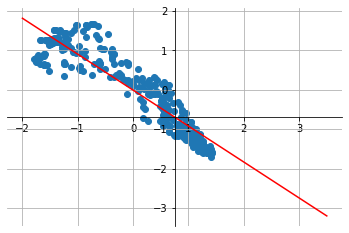

In [18]:
# Ecuacion Normal ocean
X_1_ocean = np.array([np.ones(np.shape(ocean_X_train)[0]), ocean_X_train]).T
B_ocean = np.linalg.inv(X_1_ocean.T @ X_1_ocean) @ X_1_ocean.T @ ocean_Y_train
m_ocean = B_ocean[1]
b_ocean = B_ocean[0]
print("m:" +  str(m_ocean))
print("b:" +  str(b_ocean))

fig_ocean = plt.figure()
ax_ocean = fig_ocean.add_subplot(1, 1, 1)
x_ocean = np.linspace(-5,5,100)
ax_ocean.spines['left'].set_position('center')
ax_ocean.spines['bottom'].set_position('center')
ax_ocean.spines['right'].set_color('none')
ax_ocean.spines['top'].set_color('none')
ax_ocean.xaxis.set_ticks_position('bottom')
ax_ocean.yaxis.set_ticks_position('left')
plt.scatter(ocean_X_train, ocean_Y_train)
x_ocean = np.arange(-2, 4, 0.5)
y_ocean = m_ocean * x_ocean + b_ocean
plt.plot(x_ocean, y_ocean, '-r')
plt.grid()
plt.show()

In [19]:
# Ecuacion Normal petrol
# X_1_petrol = np.array([np.ones(np.shape(petrol_X_train)[0]), petrol_X_train]).T
X_1_petrol = np.append(np.ones((petrol_X_train.shape[0],1)), petrol_X_train, axis=1)
B_petrol = np.linalg.inv(X_1_petrol.T @ X_1_petrol) @ X_1_petrol.T @ petrol_Y_train
print(B_petrol)

[[ 3.05075672e+04]
 [-1.13338355e+03]
 [-1.81049051e+00]
 [-1.45128728e-01]
 [ 3.90205259e+04]]


In [20]:
# Tabla RMSE
print(" ----------------------------------------------------------------------------")
print("|          | Precio Viviendas   | Temperatura Oceanica | Consumo de Petróleo |")
print(" ----------------------------------------------------------------------------")
print("|   RMSE   | " + str(history_price[-1][1]) + " | " + str(history_ocean[-1][1]) + "   | " + str(history_petrol[-1][1]) + "  |")
print(" ----------------------------------------------------------------------------")


 ----------------------------------------------------------------------------
|          | Precio Viviendas   | Temperatura Oceanica | Consumo de Petróleo |
 ----------------------------------------------------------------------------
|   RMSE   | 0.42874336062106155 | 0.395058454177973   | 1.029637296716318  |
 ----------------------------------------------------------------------------


In [21]:
# Hiperparametros Optimos
learning_rate_v = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
iterations_v = [*range(500, 3500, 500)]
history_price = []

for learning_rate in learning_rate_v:
  for iterations in iterations_v:
    history, cost = lineal_regression_model(price_X_train, price_Y_train, learning_rate, iterations)
    history_price.append([learning_rate, iterations, history[-1][1]])

print(history_price)

history_ocean = []

for learning_rate in learning_rate_v:
  for iterations in iterations_v:
    history, cost = lineal_regression_model(ocean_X_train, ocean_Y_train, learning_rate, iterations)
    history_ocean.append([learning_rate, iterations, history[-1][1]])

print(history_ocean)

history_petrol = []

for learning_rate in learning_rate_v:
  for iterations in iterations_v:
    history, cost = lineal_regression_model(petrol_X_train, petrol_Y_train, learning_rate, iterations)
    history_petrol.append([learning_rate, iterations, history[-1][1]])

print(history_petrol)


[[0.01, 500, 0.42874607399169073], [0.01, 1000, 0.42874336062106155], [0.01, 1500, 0.4287433605938095], [0.01, 2000, 0.42874336059380846], [0.01, 2500, 0.42874336059380846], [0.01, 3000, 0.42874336059380846], [0.05, 500, 0.42874336059380846], [0.05, 1000, 0.42874336059380846], [0.05, 1500, 0.42874336059380846], [0.05, 2000, 0.42874336059380846], [0.05, 2500, 0.42874336059380846], [0.05, 3000, 0.42874336059380846], [0.1, 500, 0.42874336059380846], [0.1, 1000, 0.42874336059380846], [0.1, 1500, 0.42874336059380846], [0.1, 2000, 0.42874336059380846], [0.1, 2500, 0.42874336059380846], [0.1, 3000, 0.42874336059380846], [0.2, 500, 0.42874336059380846], [0.2, 1000, 0.42874336059380846], [0.2, 1500, 0.42874336059380846], [0.2, 2000, 0.42874336059380846], [0.2, 2500, 0.42874336059380846], [0.2, 3000, 0.42874336059380846], [0.3, 500, 0.42874336059380846], [0.3, 1000, 0.42874336059380846], [0.3, 1500, 0.42874336059380846], [0.3, 2000, 0.42874336059380846], [0.3, 2500, 0.42874336059380846], [0.3, 3

In [22]:
print("Precio Viviendas")
print(" ---------------------------------------------------------")
print("| Tasa de Aprendizaje | Iteraciones | RMSE                |")
print(" ---------------------------------------------------------")
for his in history_price:  
  print("|        " + str(his[0]) +                "         |     " + str(his[1]) + "     | " + str(his[2]) + "  |")
print(" ---------------------------------------------------------")

print("Temperatura Oceanica")
print(" ---------------------------------------------------------")
print("| Tasa de Aprendizaje | Iteraciones | RMSE                |")
print(" ---------------------------------------------------------")
for his in history_ocean:  
  print("|        " + str(his[0]) +                "         |     " + str(his[1]) + "     | " + str(his[2]) + "  |")
print(" ---------------------------------------------------------")

print("Consumo de Petróleo")
print(" ---------------------------------------------------------")
print("| Tasa de Aprendizaje | Iteraciones | RMSE                |")
print(" ---------------------------------------------------------")
for his in history_petrol:  
  print("|        " + str(his[0]) +                "         |     " + str(his[1]) + "     | " + str(his[2]) + "  |")
print(" ---------------------------------------------------------")

Precio Viviendas
 ---------------------------------------------------------
| Tasa de Aprendizaje | Iteraciones | RMSE                |
 ---------------------------------------------------------
|        0.01         |     500     | 0.42874607399169073  |
|        0.01         |     1000     | 0.42874336062106155  |
|        0.01         |     1500     | 0.4287433605938095  |
|        0.01         |     2000     | 0.42874336059380846  |
|        0.01         |     2500     | 0.42874336059380846  |
|        0.01         |     3000     | 0.42874336059380846  |
|        0.05         |     500     | 0.42874336059380846  |
|        0.05         |     1000     | 0.42874336059380846  |
|        0.05         |     1500     | 0.42874336059380846  |
|        0.05         |     2000     | 0.42874336059380846  |
|        0.05         |     2500     | 0.42874336059380846  |
|        0.05         |     3000     | 0.42874336059380846  |
|        0.1         |     500     | 0.42874336059380846  |
|   

Precio Viviendas


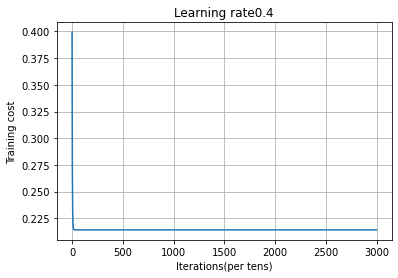

Temperatura Oceánica


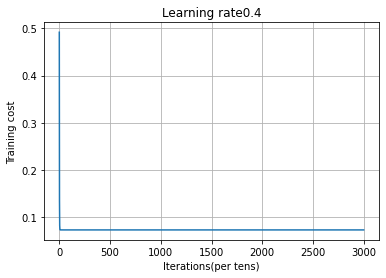

Consumo de Petroleo


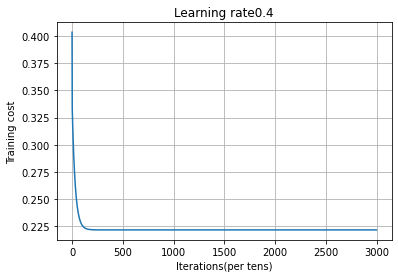

In [23]:
# Llamando a la regresion lineal Conjunto de prueba
print("Precio Viviendas")
history_price, costs_val = lineal_regression_model(price_X_val, price_Y_val, learning_rate, iterations, 1)
print("Temperatura Oceánica")
history_ocean, costs_val = lineal_regression_model(ocean_X_val, ocean_Y_val, learning_rate, iterations, 1)
print("Consumo de Petroleo")
history_petrol, costs_val = lineal_regression_model(petrol_X_val, petrol_Y_val, learning_rate, iterations, 1)

In [0]:
# Prueba de la miss
test_X_train = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/train_ex1data1.csv", sep='\t')
test_X_val = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/test_ex1data1.csv", sep='\t')

test_y_train = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/y_train_ex1data1.csv", sep='\t')
test_y_val = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/y_test_ex1data1.csv", sep='\t')

In [25]:
# Transformando a np.array
test_X_train_v = np.array(test_X_train["Num_Hab_Ciudad(Miles)"])
test_X_val_v = np.array(test_X_val["Num_Hab_Ciudad(Miles)"])

test_y_train_v = np.array([test_y_train["Rentabilidad_Ciudad(Miles)"]]).T
test_y_val_v = np.array([test_y_val["Rentabilidad_Ciudad(Miles)"]]).T

np.shape(test_y_train_v)

(68, 1)

In [0]:
# Regularizando 
test_X_train_v = regularization(test_X_train_v)
test_X_val_v = regularization(test_X_val_v)

test_y_train_v = regularization(test_y_train_v)
test_y_val_v = regularization(test_y_val_v)

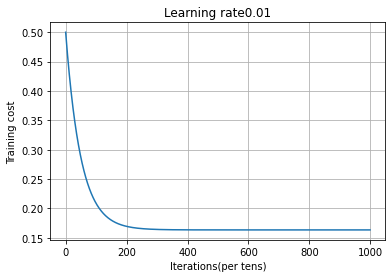

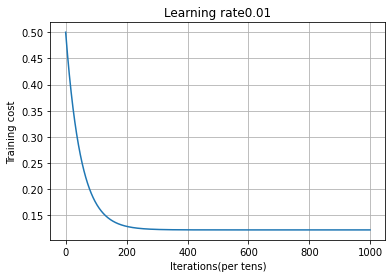

In [34]:
# Ejecutanto la regresion lineal
learning_rate = 0.01
iterations = 1000

history_test, costs_train = lineal_regression_model(test_X_train_v, test_y_train_v, learning_rate, iterations, 1)
history_val, costs_train = lineal_regression_model(test_X_val_v, test_y_val_v, learning_rate, iterations, 1)

m: 0.8204491099505731| b: 2.7886190089114113e-17


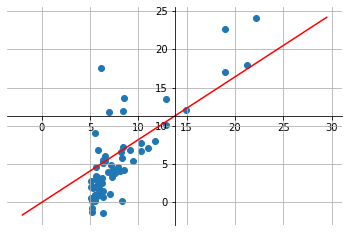

In [31]:
print("Test data")

# Grafica Datos price
# print(history_test[-1][0])
m_test = history_test[-1][0].item(1)
b_test = history_test[-1][0].item(0)

print("m: " + str(m_test) + "| b: " + str(b_test))
m_history_test = history_test[:,0]
b_history_test = history_test[:,1]

fig_test = plt.figure()
ax_test = fig_test.add_subplot(1, 1, 1)
x_test = np.linspace(-5,5,100)
ax_test.spines['left'].set_position('center')
ax_test.spines['bottom'].set_position('center')
ax_test.spines['right'].set_color('none')
ax_test.spines['top'].set_color('none')
ax_test.xaxis.set_ticks_position('bottom')
ax_test.yaxis.set_ticks_position('left')
plt.scatter(test_X_train, test_y_train)
x_test = np.arange(-2, 30, 0.5)
y_test = m_test * x_test + b_test
plt.plot(x_test, y_test, '-r')
plt.grid()
plt.show()

m:[0.82048453]
b:[5.55111512e-17]


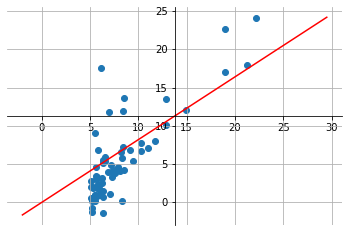

In [32]:
# Ecuacion Normal test
X_1_test = np.array([np.ones(np.shape(test_X_train_v)[0]), test_X_train_v]).T
B_test = np.linalg.inv(X_1_test.T @ X_1_test) @ X_1_test.T @ test_y_train_v
m_test = B_test[1]
b_test = B_test[0]
print("m:" +  str(m_test))
print("b:" +  str(b_test))

fig_test = plt.figure()
ax_test = fig_test.add_subplot(1, 1, 1)
x_test = np.linspace(-5,5,100)
ax_test.spines['left'].set_position('center')
ax_test.spines['bottom'].set_position('center')
ax_test.spines['right'].set_color('none')
ax_test.spines['top'].set_color('none')
ax_test.xaxis.set_ticks_position('bottom')
ax_test.yaxis.set_ticks_position('left')
plt.scatter(test_X_train, test_y_train)
x_test = np.arange(-2, 30, 0.5)
y_test = m_test * x_test + b_test
plt.plot(x_test, y_test, '-r')
plt.grid()
plt.show()

Validation data
m: 0.8691801972443983| b: -1.1159655575111486e-16


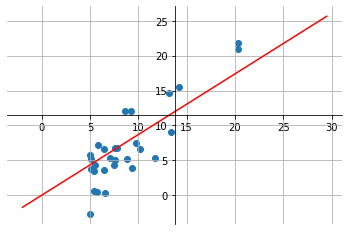

In [38]:
print("Validation data")

# Grafica Datos price
# print(history_val[-1][0])
m_val = history_val[-1][0].item(1)
b_val = history_val[-1][0].item(0)

print("m: " + str(m_val) + "| b: " + str(b_val))
m_history_val = history_val[:,0]
b_history_val = history_val[:,1]

fig_val = plt.figure()
ax_val = fig_val.add_subplot(1, 1, 1)
x_val = np.linspace(-5,5,100)
ax_val.spines['left'].set_position('center')
ax_val.spines['bottom'].set_position('center')
ax_val.spines['right'].set_color('none')
ax_val.spines['top'].set_color('none')
ax_val.xaxis.set_ticks_position('bottom')
ax_val.yaxis.set_ticks_position('left')
plt.scatter(test_X_val, test_y_val)
x_val = np.arange(-2, 30, 0.5)
y_val = m_val * x_val + b_val
plt.plot(x_val, y_val, '-r')
plt.grid()
plt.show()

m:[0.86921772]
b:[-9.71445147e-17]


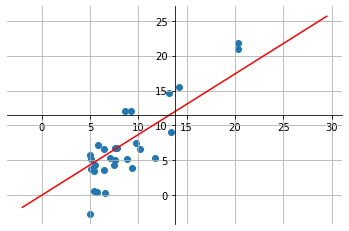

In [39]:
# Ecuacion Normal test
X_1_test = np.array([np.ones(np.shape(test_X_val_v)[0]), test_X_val_v]).T
B_test = np.linalg.inv(X_1_test.T @ X_1_test) @ X_1_test.T @ test_y_val_v
m_test = B_test[1]
b_test = B_test[0]
print("m:" +  str(m_test))
print("b:" +  str(b_test))

fig_test = plt.figure()
ax_test = fig_test.add_subplot(1, 1, 1)
x_test = np.linspace(-5,5,100)
ax_test.spines['left'].set_position('center')
ax_test.spines['bottom'].set_position('center')
ax_test.spines['right'].set_color('none')
ax_test.spines['top'].set_color('none')
ax_test.xaxis.set_ticks_position('bottom')
ax_test.yaxis.set_ticks_position('left')
plt.scatter(test_X_val, test_y_val)
x_test = np.arange(-2, 30, 0.5)
y_test = m_test * x_test + b_test
plt.plot(x_test, y_test, '-r')
plt.grid()
plt.show()